In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime


In [66]:
data_GlobalLandTemperaturesByCity = pd.read_csv("C:\\Users\\ABHAY\\PES\\3rd Year\\Data Analytics\\Project\\datasets\\DA proj\\GlobalLandTemperaturesByCity.csv")
data_GlobalLandTemperaturesByCity.head()

data_GlobalTemperatures = pd.read_csv("C:\\Users\\ABHAY\\PES\\3rd Year\\Data Analytics\\Project\\datasets\\DA proj\\GlobalTemperatures.csv")
data_GlobalTemperatures.head()


data_continents2 = pd.read_csv("C:\\Users\\ABHAY\\PES\\3rd Year\\Data Analytics\\Project\\datasets\\DA proj\\continents2.csv")
data_continents2.head()



,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


## EDA


In [67]:
print("Number of Rows: ", len(data_GlobalTemperatures. axes[0]))
print("Number of Columns: ",len(data_GlobalTemperatures. axes[1]))

Number of Rows:  3192
Number of Columns:  9


In [68]:
# Missing values
data_GlobalTemperatures.isna().sum() # there are 1200 missing values for Max, Min and Land&Ocean Average Temp


dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [69]:
data_GlobalTemperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


count    3180.000000
mean        8.374731
std         4.381310
min        -2.080000
25%         4.312000
50%         8.610500
75%        12.548250
max        19.021000
Name: LandAverageTemperature, dtype: float64


c:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


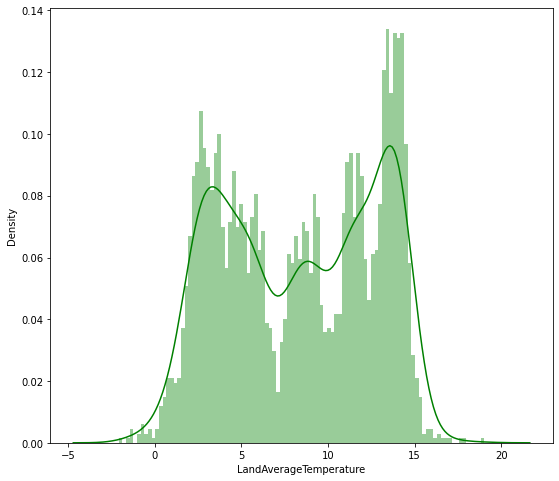

In [70]:
#summarizing Global Temperatures data and plotting
print(data_GlobalTemperatures['LandAverageTemperature'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data_GlobalTemperatures['LandAverageTemperature'], color='g', bins=100, hist_kws={'alpha': 0.4});


#We can see that there is no extreme left or right skewness and it is normally distributed with some local minima and maxima. Some outliers lie around 20.

The Land Average temp is summary is: 
count    3180.000000, 
mean is 8.374731,
std is 4.381310,
min is -2.080000,
max is 19.021000


### Numerical data distribution

In [71]:

#Taking only the numerical ones out of all datatypes
df_num = data_GlobalTemperatures.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


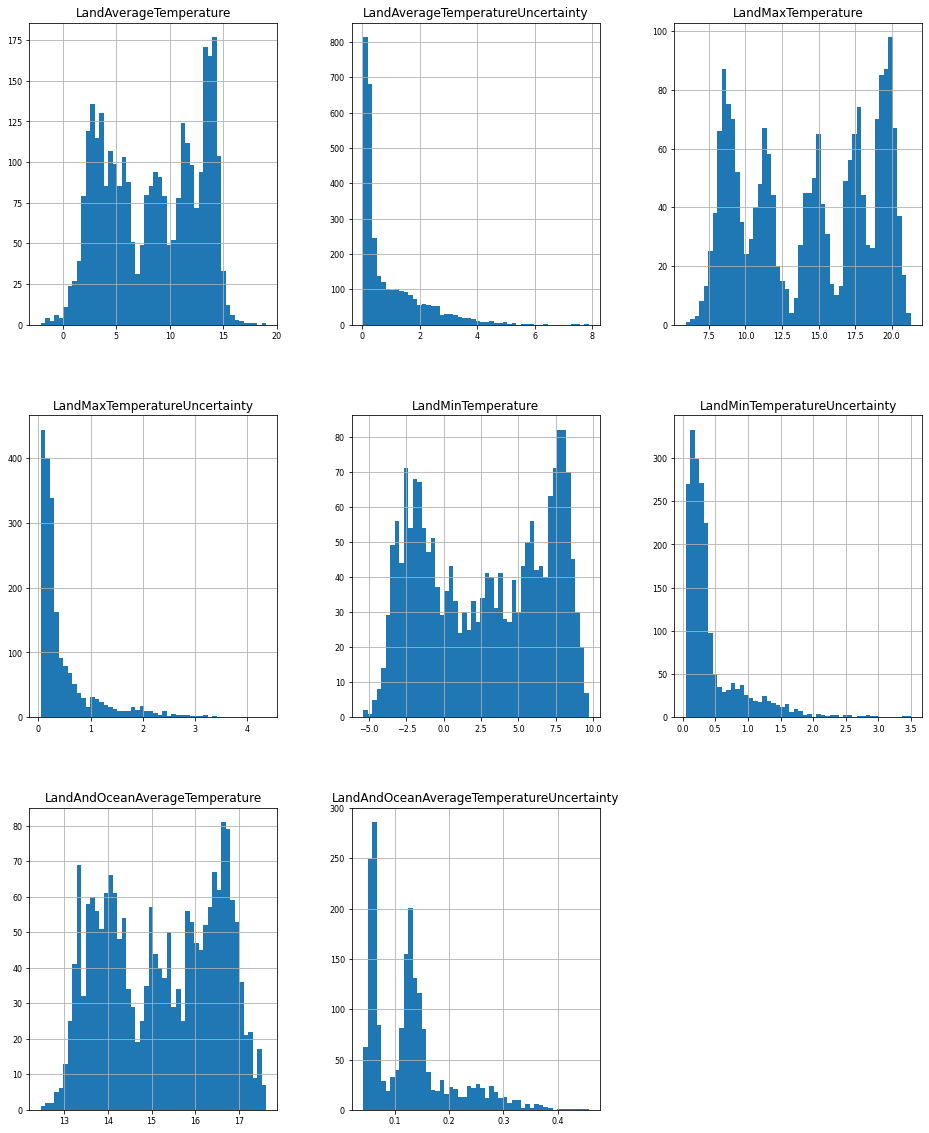

In [72]:
#Plotting all of the 
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

#Observation: Features such as LandAverageTemperatureUncertainty and LandMaxTemperatureUncertainty have a similar distribution as seen below.

In [73]:
#correlation between LandAverageTemperature and the rest
df_num_corr = df_num.corr()['LandAverageTemperature'][:] 
golden_features_list = df_num_corr[abs(df_num_corr) >= 0].sort_values(ascending=False)
print("There is {} strongly correlated values with LandAverageTemperature:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with LandAverageTemperature:
LandAverageTemperature                       1.000000
LandMaxTemperature                           0.995807
LandMinTemperature                           0.995611
LandAndOceanAverageTemperature               0.988066
LandMaxTemperatureUncertainty               -0.108462
LandAndOceanAverageTemperatureUncertainty   -0.131412
LandMinTemperatureUncertainty               -0.167451
LandAverageTemperatureUncertainty           -0.204191
Name: LandAverageTemperature, dtype: float64


In [74]:
#correlation between LandAndOceanAverageTemperatureUncertainty and the rest
df_num_corr = df_num.corr()['LandAndOceanAverageTemperatureUncertainty'][:] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with LandAndOceanAverageTemperatureUncertainty:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with LandAndOceanAverageTemperatureUncertainty:
LandAndOceanAverageTemperatureUncertainty    1.000000
LandAverageTemperatureUncertainty            0.972405
LandMinTemperatureUncertainty                0.880062
LandMaxTemperatureUncertainty                0.860425
Name: LandAndOceanAverageTemperatureUncertainty, dtype: float64


In [75]:
#correlation between LandAndOceanAverageTemperature and the rest
df_num_corr = df_num.corr()['LandAndOceanAverageTemperature'][:] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with LandAndOceanAverageTemperature:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with LandAndOceanAverageTemperature:
LandAndOceanAverageTemperature    1.000000
LandAverageTemperature            0.988066
LandMinTemperature                0.986402
LandMaxTemperature                0.983855
Name: LandAndOceanAverageTemperature, dtype: float64


In [76]:
#correlation between LandMaxTemperature and the rest
df_num_corr = df_num.corr()['LandMaxTemperature'][:] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with LandMaxTemperature:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with LandMaxTemperature:
LandMaxTemperature                1.000000
LandAverageTemperature            0.995807
LandMinTemperature                0.993404
LandAndOceanAverageTemperature    0.983855
Name: LandMaxTemperature, dtype: float64


In [77]:
#correlation between LandMinTemperature and the rest
df_num_corr = df_num.corr()['LandMinTemperature'][:] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with LandMinTemperature:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with LandMinTemperature:
LandMinTemperature                1.000000
LandAverageTemperature            0.995611
LandMaxTemperature                0.993404
LandAndOceanAverageTemperature    0.986402
Name: LandMinTemperature, dtype: float64


## outlier analysis

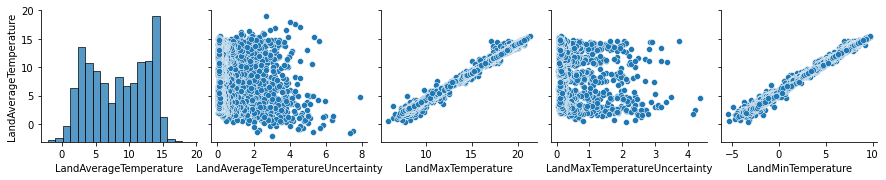

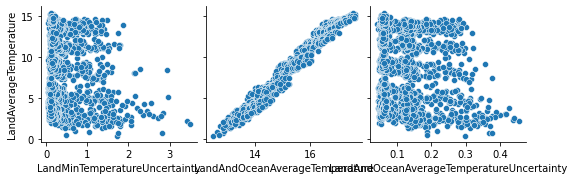

In [78]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['LandAverageTemperature'])